Q1

C:\Users\macbook\AppData\Local\Temp\ipykernel_3992\736686181.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = clustering_data['Rating'].apply(assign_cluster)
C:\Users\macbook\AppData\Local\Temp\ipykernel_3992\736686181.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Kmeans_Cluster'] = cluster_labels


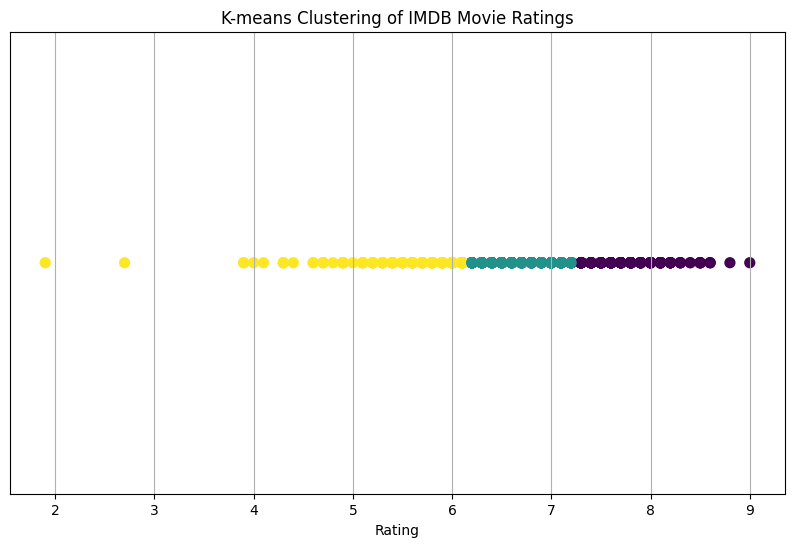


Cluster 0:
Drama        192
Adventure     79
Comedy        67
Action        62
Thriller      50
Crime         42
Biography     39
Sci-Fi        31
Mystery       30
Romance       28
Fantasy       28
Animation     26
History       17
Family        11
Horror         9
War            8
Sport          7
Music          7
Musical        3
Western        2
dtype: int64

Cluster 1:
Drama        173
Action       142
Comedy       127
Adventure    103
Thriller      70
Romance       69
Crime         67
Sci-Fi        49
Mystery       46
Horror        45
Fantasy       37
Family        27
Biography     27
Animation     17
History        7
Music          7
Sport          7
War            2
Musical        1
Western        1
dtype: int64

Cluster 2:
Action       73
Adventure    62
Comedy       56
Drama        54
Horror       33
Thriller     28
Fantasy      27
Sci-Fi       27
Romance      23
Crime        17
Family       10
Mystery      10
Animation     2
Sport         1
History       1
Musical       1
Mu

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMDB-Movie-Data.csv'
imdb_data = pd.read_csv(file_path)

# Data Preprocessing: Focus on Rating and Genre
imdb_cleaned = imdb_data.dropna(subset=['Revenue (Millions)', 'Metascore'])
clustering_data = imdb_cleaned[['Rating', 'Genre']]

# Define the rating thresholds for clusters
def assign_cluster(rating):
    if rating >= 8:
        return 0  # Top Rated
    elif 6 <= rating < 8:
        return 1  # Average Rated
    else:
        return 2  # Low Rated

# Assign initial cluster labels based on the predefined scale
clustering_data['Cluster'] = clustering_data['Rating'].apply(assign_cluster)

# Prepare data for K-means
X = clustering_data['Rating'].values.reshape(-1, 1)

# Initialize random centroids
np.random.seed(0)
centroids = np.array([8.5, 7, 5]).reshape(-1, 1)

# K-means Algorithm Implementation
def kmeans(X, centroids, max_iters=100):
    for _ in range(max_iters):
        # Step 1: Assign clusters based on closest centroid
        distances = np.abs(X - centroids.T)
        cluster_labels = np.argmin(distances, axis=1)

        # Step 2: Recompute centroids
        new_centroids = np.array([X[cluster_labels == i].mean() for i in range(centroids.shape[0])]).reshape(-1, 1)
        
        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids

    return cluster_labels, centroids

# Run K-means clustering
cluster_labels, final_centroids = kmeans(X, centroids)

# Assign the final clusters back to the dataframe
clustering_data['Kmeans_Cluster'] = cluster_labels

# Analyze genres within clusters
def analyze_genres(data):
    genre_analysis = {}
    for cluster in np.unique(data['Kmeans_Cluster']):
        genres = data[data['Kmeans_Cluster'] == cluster]['Genre'].str.get_dummies(sep=',')
        genre_counts = genres.sum().sort_values(ascending=False)
        genre_analysis[cluster] = genre_counts
    return genre_analysis

# Perform genre analysis
genre_analysis = analyze_genres(clustering_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['Rating'], np.zeros_like(clustering_data['Rating']), c=clustering_data['Kmeans_Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering of IMDB Movie Ratings')
plt.xlabel('Rating')
plt.yticks([])  # Hide y-axis
plt.grid()
plt.show()

# Display the genre analysis
for cluster, genres in genre_analysis.items():
    print(f"\nCluster {cluster}:")
    print(genres)

